In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
# --------------------
# Missing Values Check
# --------------------

na_vals = df.isna().sum()
print("NA Values:\n", na_vals)

NA Values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


# Numerical Features Analysis

In [77]:
# ------------------
# Numerical Features
# ------------------
df.select_dtypes(include=['number']).columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [42]:
# total size
total = len(df)

# percentage per campaign value
campaign_pct = df["campaign"].value_counts() / total

# campaigns below 2%
rare_campaigns = campaign_pct[campaign_pct < 0.02].index

# new feature
df["campaign_readable"] = df["campaign"].where(
    ~df["campaign"].isin(rare_campaigns),
    other="Other (<2%)"
)

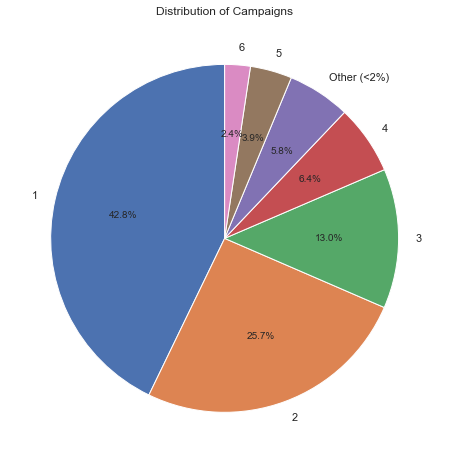

In [43]:
# percentages per category
counts = df["campaign_readable"].value_counts(normalize=True) * 100


plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct="%.1f%%", startangle=90)
plt.title("Distribution of Campaigns")
plt.show()

In [73]:
(df['duration'] > 1500).sum()/ total

0.005001456734971351

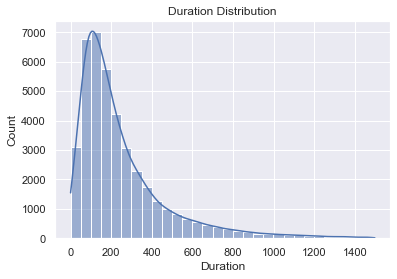

In [76]:
sns.histplot(df.loc[df["duration"] < 1500, "duration"], bins=30, kde=True)
plt.title("Duration Distribution")
plt.xlabel("Duration")
plt.ylabel("Count")
plt.show()

In [81]:
((df['pdays'] == 999).sum()/total) * 100

96.32174419733903

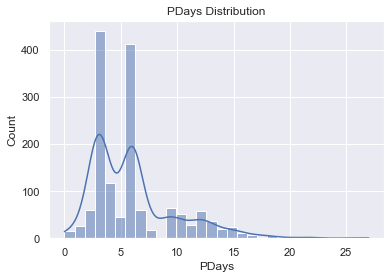

In [83]:
sns.histplot(df.loc[df["pdays"] != 999, "pdays"], bins=30, kde=True)
plt.title("PDays Distribution")
plt.xlabel("PDays")
plt.ylabel("Count")
plt.show()

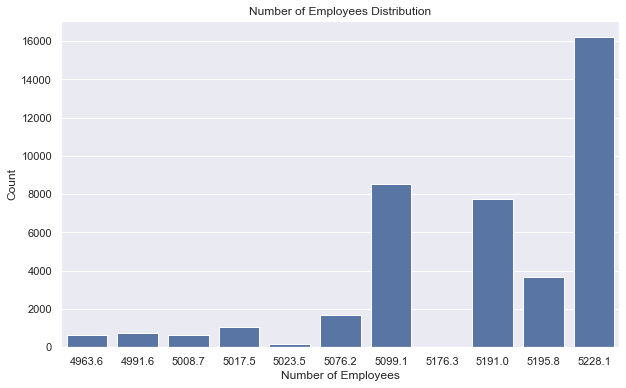

In [99]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="nr.employed")

plt.title("Number of Employees Count")
plt.xlabel("Number of Employees")
plt.ylabel("Count")
plt.show()

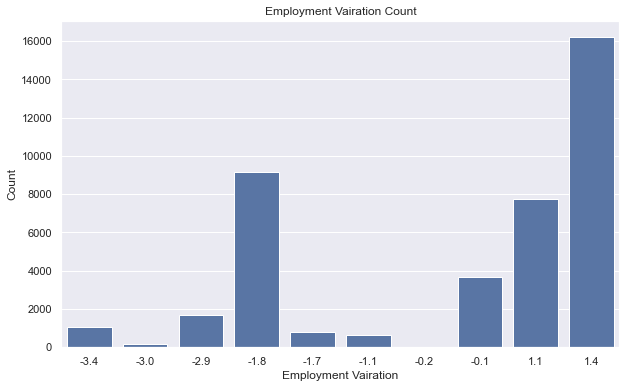

In [100]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="emp.var.rate")

plt.title("Employment Vairation Count")
plt.xlabel("Employment Vairation")
plt.ylabel("Count")
plt.show()

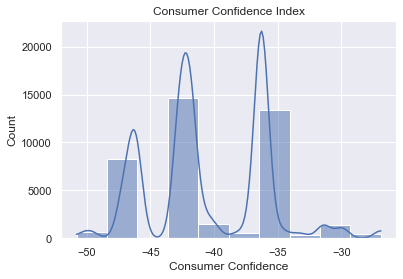

In [103]:
sns.histplot(df['cons.conf.idx'], bins=10, kde=True)
plt.title("Consumer Confidence Index")
plt.xlabel("Consumer Confidence")
plt.ylabel("Count")
plt.show()

# Categorical Features Analysis

In [106]:
df.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y', 'campaign_readable'],
      dtype='object')

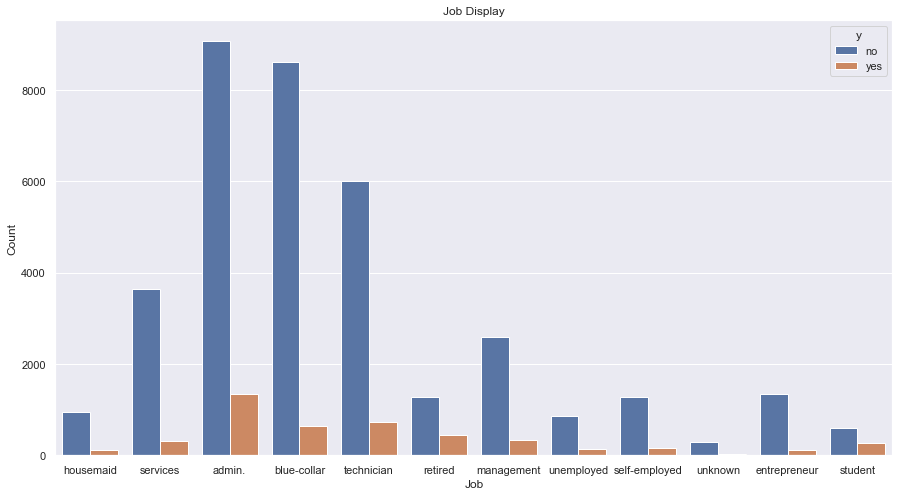

In [120]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x="job", hue="y")
plt.title("Job Display")
plt.xlabel("Job")
plt.ylabel("Count")
plt.show()

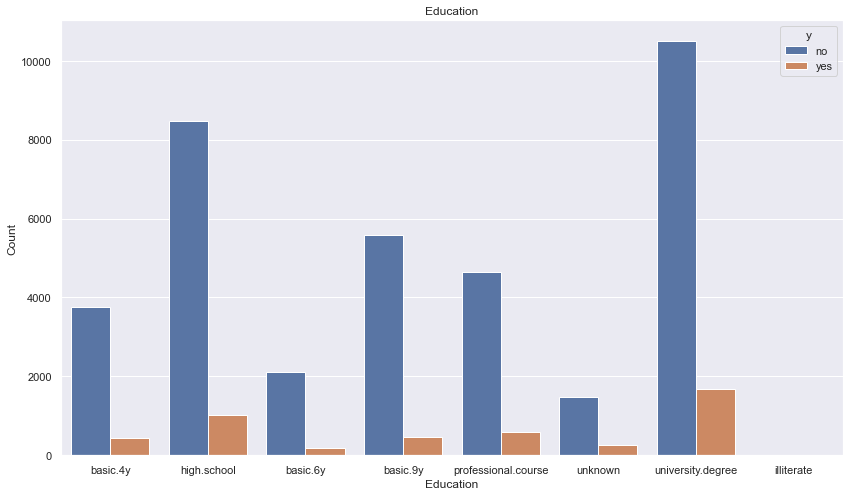

In [118]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x="education", hue="y")
plt.title("Education")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

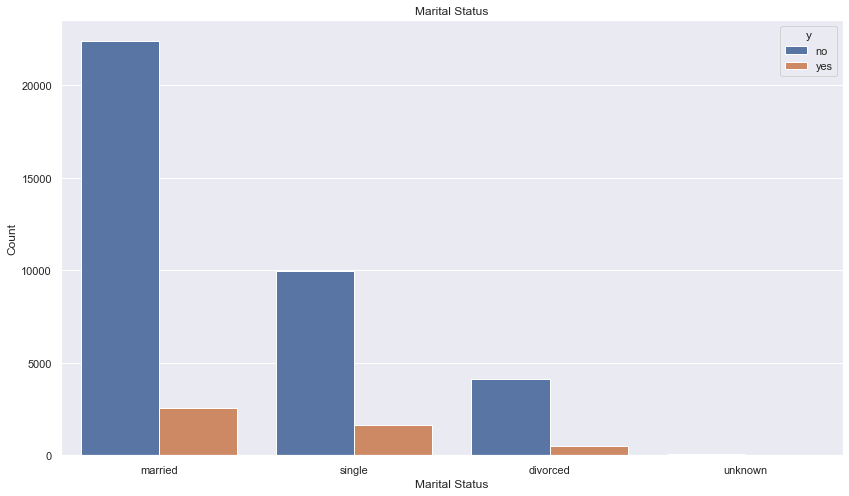

In [121]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x="marital", hue="y")
plt.title("Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()